In [2]:
import os
import csv
import cv2
import numpy as np
import sklearn
from sklearn.utils import shuffle
import matplotlib.image as mpimg

angle_correct = 0.23
      
samples = []
with open('./driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for line in reader:
        samples.append(line)

images = []
angles = []
for sample in samples:
    center_angle = float(sample[3])
    for i in range(3):
        name = './IMG/'+sample[i].split('/')[-1]
        img = cv2.imread(name)
        #img = cv2.resize(img, (80,40))
        #img = img[:,:,2] #choose S channel          
        images.append(img)
        images.append(cv2.flip(img,1))                                      
                    
        if(i== 0):                        
            angles.append(center_angle)
            angles.append(center_angle* -1)
        if(i == 1):
            angles.append(center_angle + angle_correct)
            angles.append((center_angle + angle_correct)* -1)                     
        if(i== 2):
            angles.append(center_angle - angle_correct)
            angles.append((center_angle - angle_correct)* -1)
                        
            # trim image to only see section with road
X_train = np.array(images)
y_train = np.array(angles)

from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Lambda, Convolution2D, Dropout, MaxPooling2D

model = Sequential()
model.add(Cropping2D(cropping = ((75,25),(0,0)), input_shape=(160, 320, 3)))
model.add(Lambda(lambda x: (x/255.0) - 0.5))
model.add(Convolution2D(24, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))
#model.add(MaxPooling2D())
model.add(Convolution2D(32, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))
#model.add(MaxPooling2D())
model.add(Convolution2D(48, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))
#model.add(MaxPooling2D())
model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1,1), activation='relu'))
#model.add(MaxPooling2D())
model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1,1), activation='relu'))
#model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(10))
#model.add(Dropout(0.5))
model.add(Dense(1))
          
model.compile(loss = 'mse', optimizer = 'adam')

history_object = model.fit(X_train, y_train, batch_size=32, nb_epoch=8,
                  shuffle=True, verbose=1, validation_split = 0.1)
       
model.save('model.h5')
          
       

Using TensorFlow backend.
/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), padding="same", activation="relu", strides=(2, 2))`
/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same", activation="relu", strides=(2, 2))`
/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), padding="same", activation="relu", strides=(2, 2))`
/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu", strides=(1, 1))`
/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` c

Train on 27637 samples, validate on 3071 samples
Epoch 1/8
27637/27637 [==============================] - 385s 14ms/step - loss: 0.0387 - val_loss: 0.0469
Epoch 2/8
27637/27637 [==============================] - 344s 12ms/step - loss: 0.0317 - val_loss: 0.0443
Epoch 3/8
27637/27637 [==============================] - 322s 12ms/step - loss: 0.0300 - val_loss: 0.0473
Epoch 4/8
27637/27637 [==============================] - 338s 12ms/step - loss: 0.0291 - val_loss: 0.0444
Epoch 5/8
27637/27637 [==============================] - 339s 12ms/step - loss: 0.0280 - val_loss: 0.0484
Epoch 6/8
27637/27637 [==============================] - 382s 14ms/step - loss: 0.0272 - val_loss: 0.0441
Epoch 7/8
27637/27637 [==============================] - 379s 14ms/step - loss: 0.0269 - val_loss: 0.0474
Epoch 8/8
27637/27637 [==============================] - 375s 14ms/step - loss: 0.0259 - val_loss: 0.0459


ImportError: cannot import name 'plt'

dict_keys(['val_loss', 'loss'])


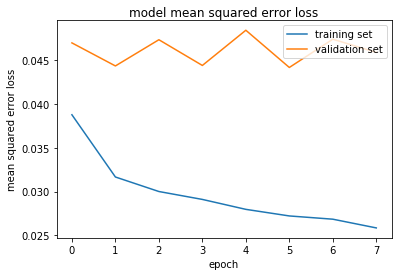

In [5]:
import matplotlib.pyplot as plt
print(history_object.history.keys())
          
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()   